In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [ ]:
#01 Distribution plots

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


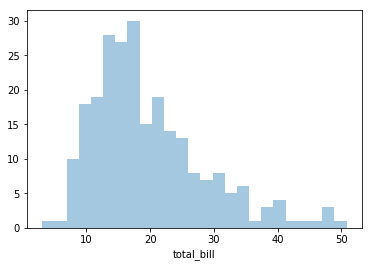

In [9]:
sns.distplot(tips['total_bill'],kde=False, bins=25)  #histogram and kde

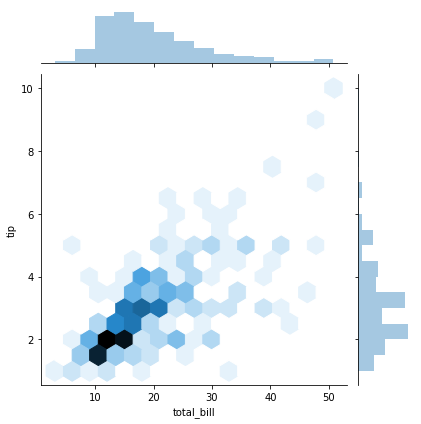

In [14]:
sns.jointplot(x='total_bill',y='tip', data=tips, kind='hex') #combine bivariate data
# kind='reg'    kind='kde'

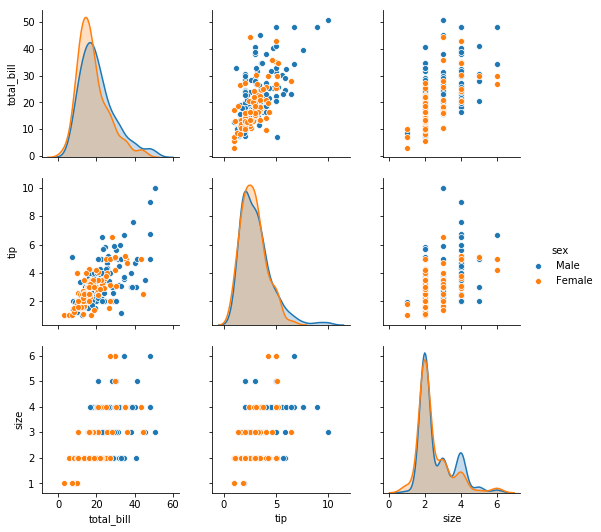

In [18]:
sns.pairplot(tips, hue='sex') #plot pairwise relationships across an entire dataframe. 
#Does jointplot for all combinations of numerical columns
#pass in a categorical variable under hue=''
# palette = ''   maps on a colormap to the data   e.g.   'cool'

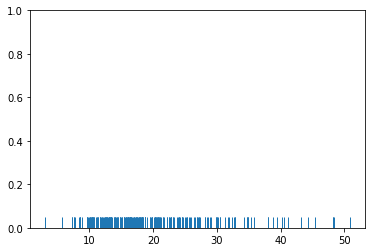

In [19]:
sns.rugplot(tips['total_bill'])

(0, 1)

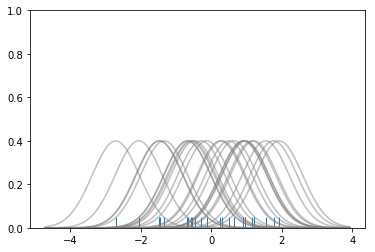

In [20]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [28]:
#02 Categorical plots

In [29]:
import numpy as np

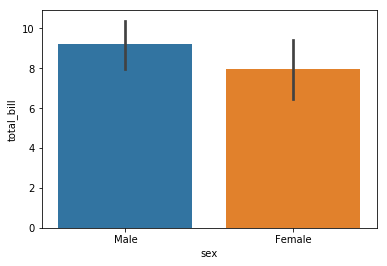

In [30]:
sns.barplot(x='sex',y='total_bill', data=tips, estimator=np.std) #estimator can take any agrigating function

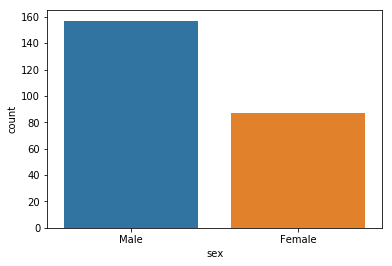

In [31]:
sns.countplot(x='sex',data=tips)

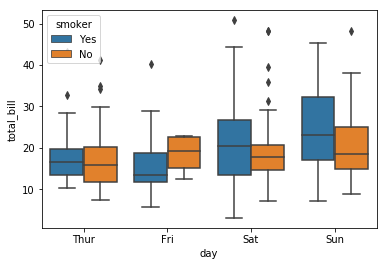

In [33]:
sns.boxplot(x='day',y='total_bill', data=tips, hue='smoker')
#adding the hue variable is a huge asset of seaborn. Allows you to quickly and smoothly add another layer of data

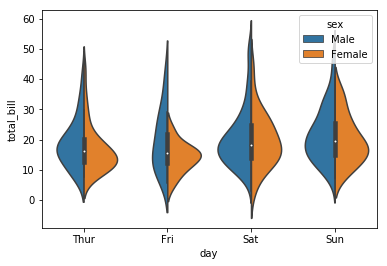

In [35]:
sns.violinplot(x='day', y='total_bill', data= tips, hue='sex', split='True')

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


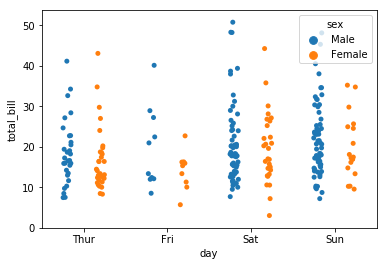

In [39]:

sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

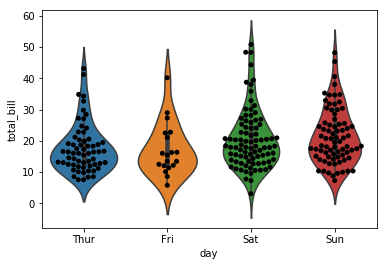

In [41]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips,color='black')

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


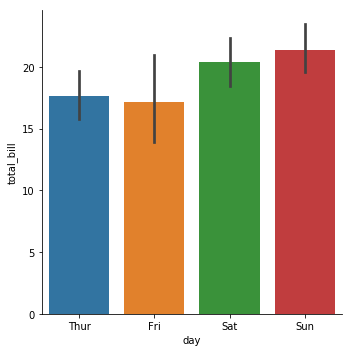

In [42]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


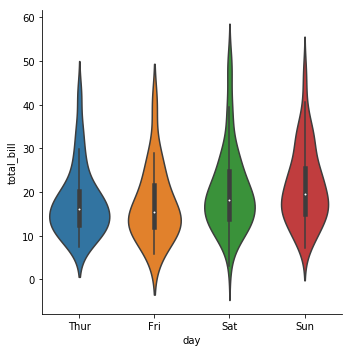

In [43]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='violin')

In [3]:
#47. Matrix plots

In [6]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [8]:
#heatmaps
#to be in matrix form you must have variables on the rows and columns
#one way to do this is with a corr
tc = tips.corr()

In [9]:
tc.head()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


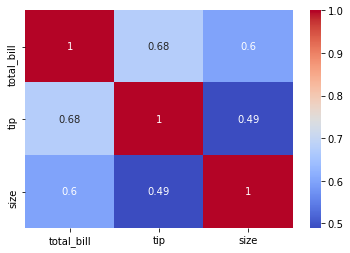

In [13]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [14]:
flights.head() #how do we convert one variable to a columnn? 

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [18]:
fp = flights.pivot_table(index='month', columns='year',values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


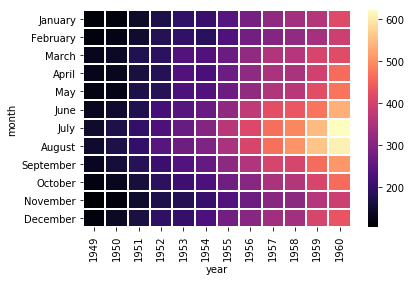

In [22]:
sns.heatmap(fp, cmap='magma', lw=1)

In [23]:
# cluster map uses hierarchical clustsering to produce a clustered version of a heatmap

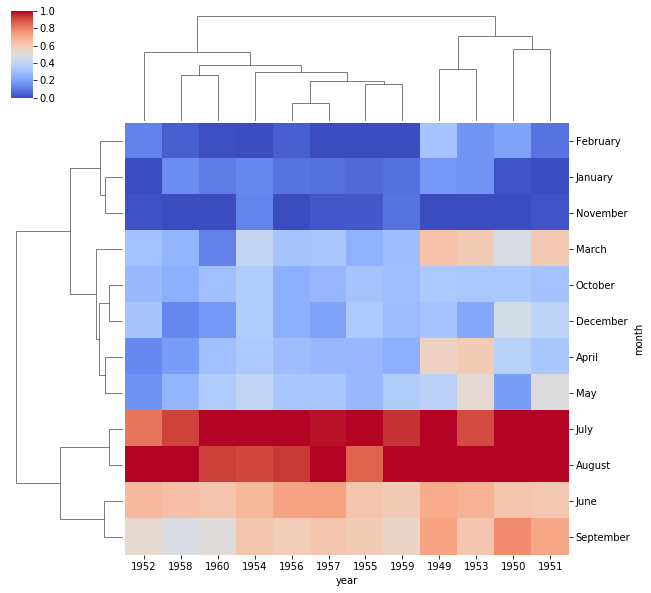

In [26]:
sns.clustermap(fp,cmap='coolwarm', standard_scale=1)

In [27]:
#51 Grids

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
import matplotlib.pyplot as plt

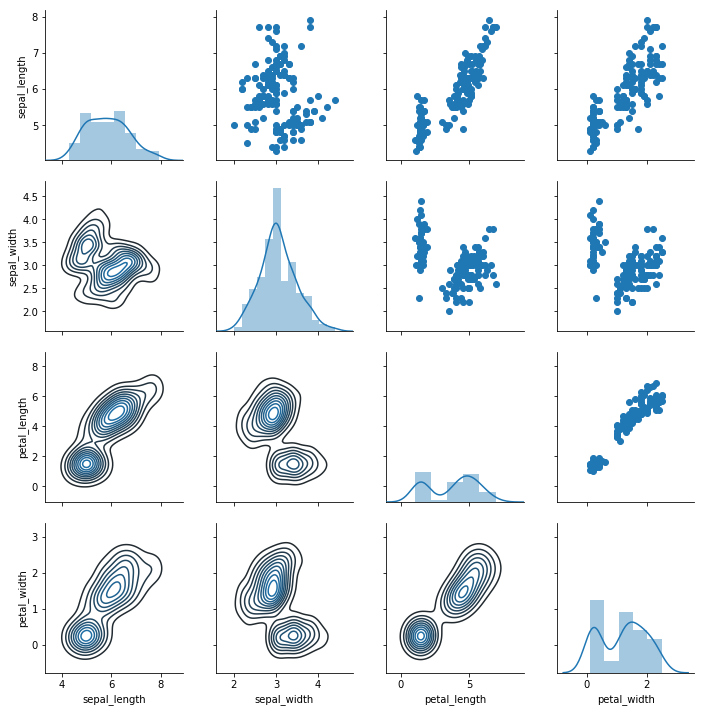

In [35]:
ig = sns.PairGrid(iris) #creates an empty pairplot
ig.map_diag(sns.distplot)
ig.map_upper(plt.scatter)
ig.map_lower(sns.kdeplot)

In [37]:
#facet grid
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


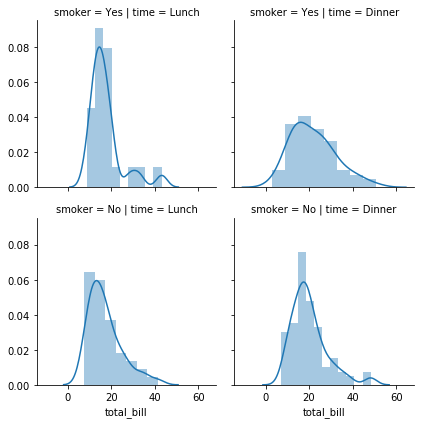

In [39]:
g = sns.FacetGrid(data=tips, col='time', row='smoker') #creates an empty grid you can map plot types to
g.map(sns.distplot, 'total_bill')

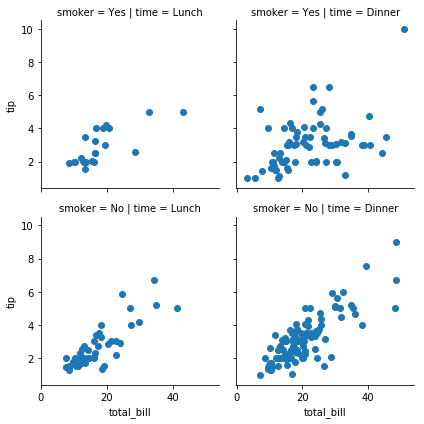

In [41]:
g = sns.FacetGrid(data=tips, col='time', row='smoker') #creates an empty grid you can map plot types to
g.map(plt.scatter, 'total_bill', 'tip') #requires two variables

In [42]:
#52 Regression Plots 

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


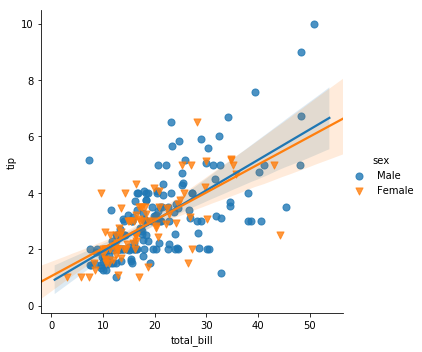

In [47]:
sns.lmplot(x='total_bill', y='tip',data=tips, hue='sex', markers=['o','v'],
          scatter_kws={'s':50}) #sns is calling matplotlib under the hood. So you can affect matplot lib directyl 

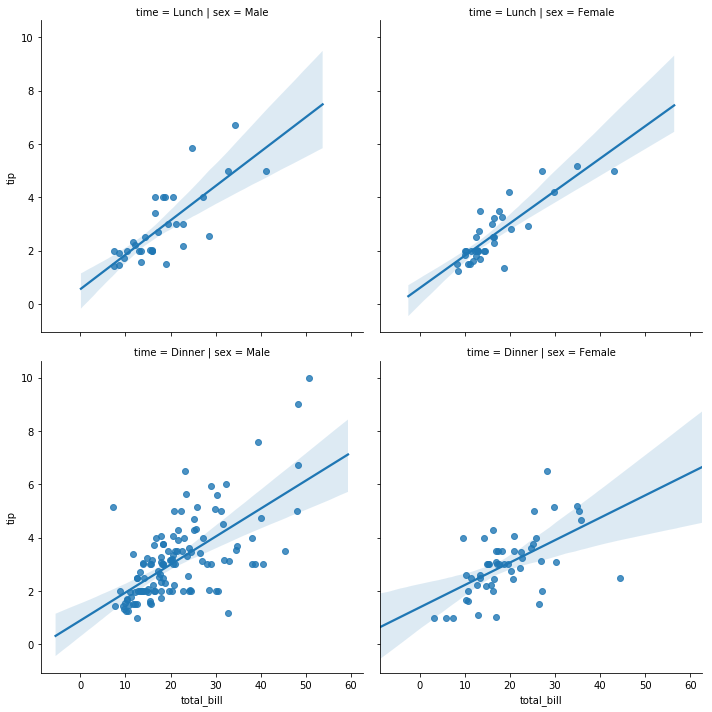

In [49]:
#use a grid instead of separating by hue
sns.lmplot(x='total_bill', y='tip',data=tips, col='sex', row='time')

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


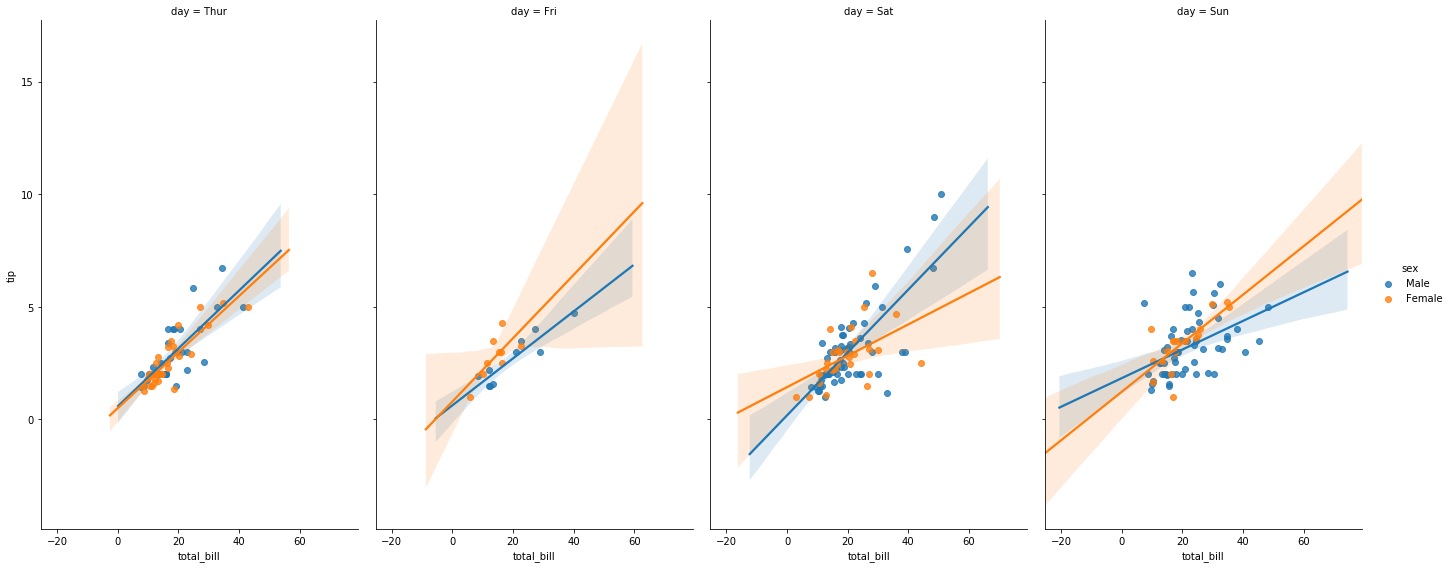

In [51]:
sns.lmplot(x='total_bill', y='tip',data=tips, col='day',hue='sex', # you could add hue on top 
          aspect=0.6, size=8) #seaborn plots have variable size and aspect ratios but you can control them

In [52]:
#53 style and color

In [53]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


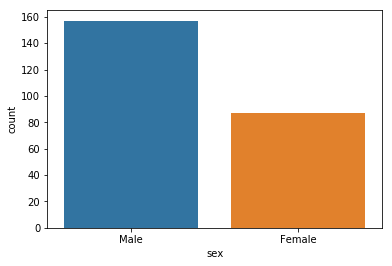

In [55]:
sns.countplot(x='sex', data=tips)

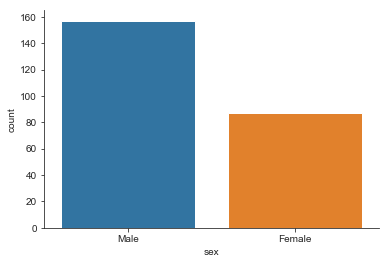

In [61]:
sns.set_style('ticks') #darkgrid, whitegrid, dark, white, ticks
sns.countplot(x='sex', data=tips)
sns.despine()  #default removes top and right but you can remove all four. left=True, bottom=True

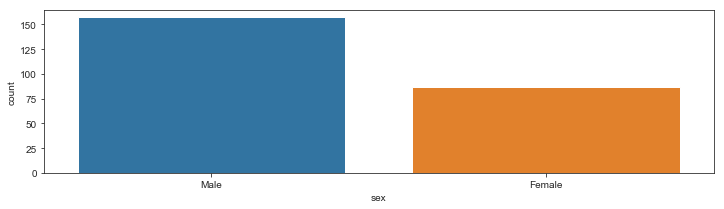

In [62]:
plt.figure(figsize=(12,3)) #matplot lib will set the figure size for seaborn since sb runs on top of plt
sns.countplot(x='sex', data=tips)

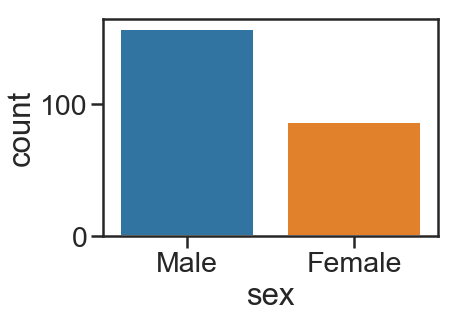

In [67]:
#scale and context
sns.set_context('poster', font_scale=1.3)  #paper, talk, poster are also  contexts
sns.countplot(x='sex', data=tips)

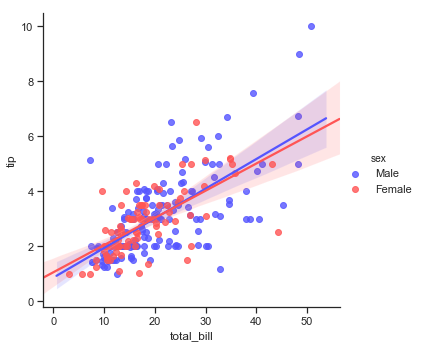

In [76]:
#palettes and colors
sns.set_context('notebook')
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic') #palette strings are found on matplot libs colormap
#documentation page